In [1]:
import json
from char_process import *
from draw_character import *
from torchvision import transforms
from matplotlib.pyplot import imshow
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
cp = CharProcess()

In [36]:
common_chinese = []
with open('./data/3500chinese.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip()
        common_chinese.append(line)
        

with open('./data/chars_dict_all.json', 'r') as f:
    chars_dict_all = json.load(f)
all_label = list(chars_dict_all.keys())

first_chinese = []
with open('./data/first_chinese.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip()
        first_chinese.append(line)

small_all_label = set(first_chinese).union(chars_dict_all)
big_all_label = set(common_chinese).union(small_all_label)

no_needed = set()
for item in big_all_label:
    if cp.is_full_width_char(item) or cp.is_full_width_digit(item):
        no_needed.add(item)
big_all_label = big_all_label.difference(no_needed)

with open('./data/generate_label.txt', 'w') as f:
    for item in big_all_label:
        f.write(item + '\n')

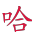

In [59]:
font = ImageFont.truetype('./font/gb2312.ttf', size=32)
img = draw_char('U', font, 25, 32)

background = Image.open('./img/background/patch_T1.3BPFFJdXXXXXXXX_!!0-item_pic.jpg.jpg')

paste(img, background)

rotation_transform = transforms.RandomRotation((-30, 30))
random_crop = transforms.RandomCrop(32)

In [20]:
with open('./data/chars_dict_all.json', 'r') as f:
    chars_dict_all = json.load(f)

big_label = set()

with open('./data/generate_label.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip()
        big_label.add(line)




difference = big_label.difference(set(chars_dict_all.keys()))
hehe = set(chars_dict_all.keys()).difference(big_label)


In [22]:
from collections import OrderedDict
order = OrderedDict()
pos = -1
for key in chars_dict_all.keys():
    if key not in hehe:
        order[key] = chars_dict_all[key]
        pos = order[key]
print(len(order))
for item in difference:
    if item == '':
        continue
    pos += 1
    order[item] = pos

with open('./data/big_label.json', 'w') as f:
    json.dump(order, f, ensure_ascii=False)

4367


In [23]:
lala = list(order.values())

In [25]:
len(lala)

5121